In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount='True')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import math
import copy

import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv('/content/drive/MyDrive/dataset_mood_smartphone.csv')  

df = df.drop(['Unnamed: 0'], axis=1)
df2 = copy.deepcopy(df)

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq


class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

# def get_date_list(indeces, minimumsize):
#   big_list = []
#   indeces = pd.to_datetime(indeces)
#   l = []
#   lengths = []
#   for i, date in enumerate(indeces[:-1]):
#     l.append(date.date())
#     # print(date)
#     if pd.Timedelta(indeces[i+1]-date).days > 1:
#       if len(l)>minimumsize:
#         big_list+=l
#         lengths += 
#       l = []
#       continue

#   if len(l)>minimumsize:
#     big_list+= l
#   return big_list


# liss = ['2014-02-26', '2014-02-27', '2014-03-21', '2014-03-22',
#                '2014-03-23', '2014-03-24', '2014-03-25', '2014-03-26',
#                '2014-03-27', '2014-03-28', '2014-03-29', '2014-03-30',
#                '2014-03-31', '2014-04-01', '2014-04-02', '2014-04-03',
#                '2014-04-04', '2014-04-05', '2014-04-06', '2014-04-07',
#                '2014-04-08', '2014-04-09', '2014-04-10', '2014-04-11',
#                '2014-04-12', '2014-04-13', '2014-04-14', '2014-04-15',
#                '2014-04-16', '2014-04-17', '2014-04-18', '2014-04-19',
#                '2014-04-20', '2014-04-21', '2014-04-22', '2014-04-23',
#                '2014-04-24', '2014-04-25', '2014-04-26', '2014-04-27',
#                '2014-04-28', '2014-04-29', '2014-04-30', '2014-05-01',
#                '2014-05-02', '2014-05-03', '2014-05-04']

  
# get_date_list(liss, 10)

In [ ]:
df['time']= pd.to_datetime(df['time']).dt.date
df.min(axis=0)
df.id.unique()

df = df.pivot_table(index=['id', 'time'], columns='variable', values='value', aggfunc=np.sum)

# df.head(100)

In [ ]:
df2['time']= pd.to_datetime(df2['time']).dt.date

df2.min(axis=0)
df2.id.unique()
# df = df.loc[df['screen'] > 1]
df2 = df2.pivot_table(index=['id', 'time'], columns='variable', values='value', aggfunc=np.mean)

Training user AS14.25
epoch:   1 loss: 0.00172244
epoch:  26 loss: 0.25668496
epoch:  51 loss: 0.20201598
epoch:  75 loss: 0.0005880383


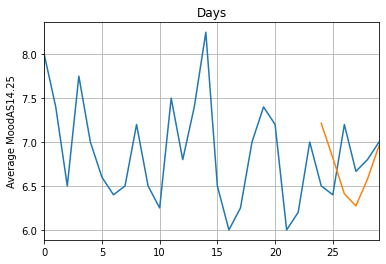

Training user AS14.06
epoch:   1 loss: 0.64881712
epoch:  26 loss: 0.10871527
epoch:  51 loss: 0.04789520
epoch:  75 loss: 0.0032880015


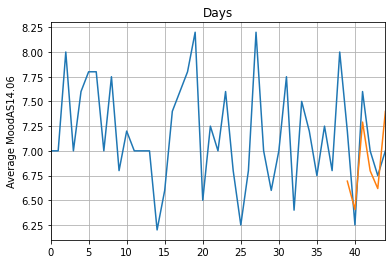

Training user AS14.30
epoch:   1 loss: 0.24912310
epoch:  26 loss: 0.13399445
epoch:  51 loss: 0.03398167
epoch:  75 loss: 0.0278509371


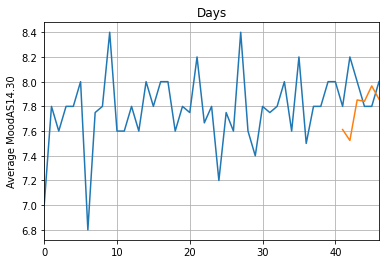

Training user AS14.12
epoch:   1 loss: 0.24330916
epoch:  26 loss: 0.00232222
epoch:  51 loss: 0.00002068
epoch:  75 loss: 0.0005230231


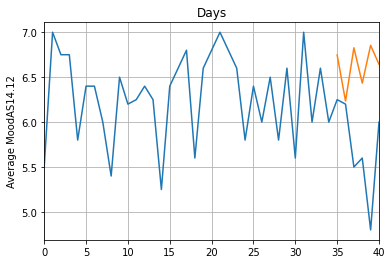

Training user AS14.32
epoch:   1 loss: 0.00686779
epoch:  26 loss: 0.01247708
epoch:  51 loss: 0.00153198
epoch:  75 loss: 0.0000004739


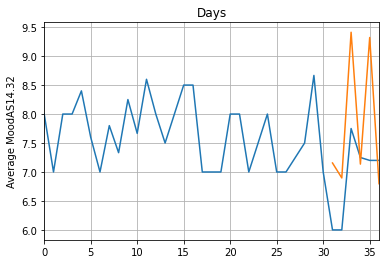

Training user AS14.33
epoch:   1 loss: 0.00062661
epoch:  26 loss: 0.00045413
epoch:  51 loss: 0.00230485
epoch:  75 loss: 0.0112778656


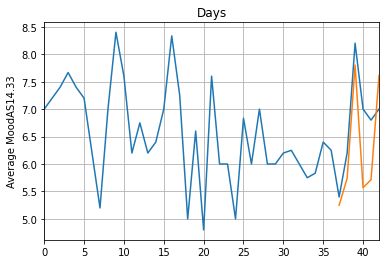

Training user AS14.20
epoch:   1 loss: 0.16599146
epoch:  26 loss: 0.00190849
epoch:  51 loss: 0.07266197
epoch:  75 loss: 0.0000871102


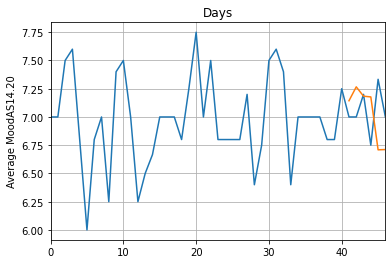

Training user AS14.19
epoch:   1 loss: 0.05667666
epoch:  26 loss: 0.01071690
epoch:  51 loss: 0.00002348
epoch:  75 loss: 0.0000056594


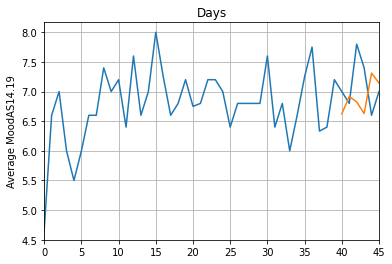

Training user AS14.24
epoch:   1 loss: 0.00481729
epoch:  26 loss: 0.00569154
epoch:  51 loss: 0.00977814
epoch:  75 loss: 0.0013273063


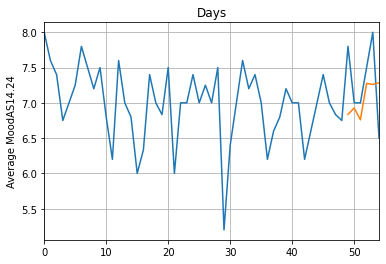

Training user AS14.17
epoch:   1 loss: 0.07464616
epoch:  26 loss: 0.00006010
epoch:  51 loss: 0.00041340
epoch:  75 loss: 0.0000331991


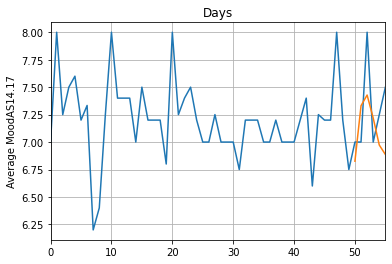

Training user AS14.07
epoch:   1 loss: 0.00437972
epoch:  26 loss: 0.00171746
epoch:  51 loss: 0.00002433
epoch:  75 loss: 0.0004517403


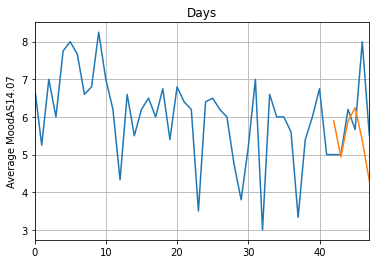

Training user AS14.31
epoch:   1 loss: 0.00024984
epoch:  26 loss: 0.00495388
epoch:  51 loss: 0.00016464
epoch:  75 loss: 0.0029034039


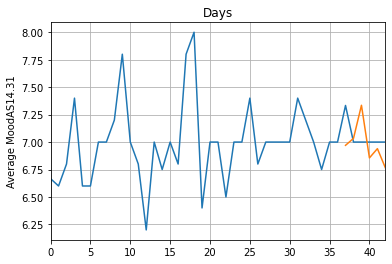

Training user AS14.26
epoch:   1 loss: 0.52212334
epoch:  26 loss: 0.00007418
epoch:  51 loss: 0.00002487
epoch:  75 loss: 0.0003052655


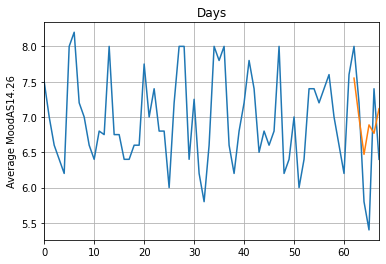

Training user AS14.27
epoch:   1 loss: 0.11120322
epoch:  26 loss: 0.00000387
epoch:  51 loss: 0.00001148
epoch:  75 loss: 0.0000045642


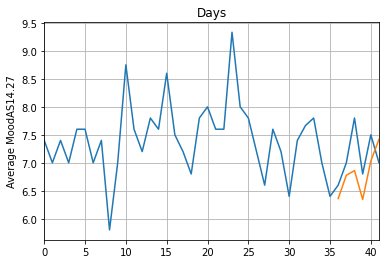

Training user AS14.05
epoch:   1 loss: 0.09499700
epoch:  26 loss: 0.03165307
epoch:  51 loss: 0.00556587
epoch:  75 loss: 0.0009546627


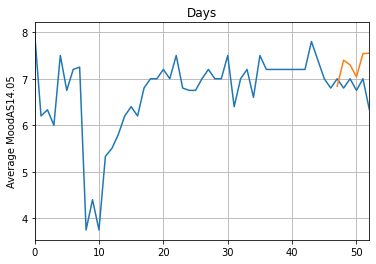

Training user AS14.23
epoch:   1 loss: 0.00012042
epoch:  26 loss: 0.00001099
epoch:  51 loss: 0.00000005
epoch:  75 loss: 0.0000022443


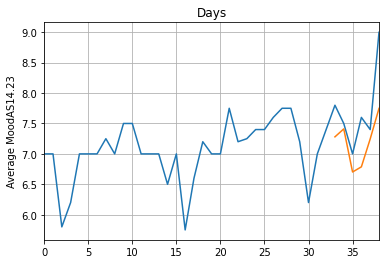

Training user AS14.28
epoch:   1 loss: 0.31621355
epoch:  26 loss: 0.00000039
epoch:  51 loss: 0.00002998
epoch:  75 loss: 0.0003202240


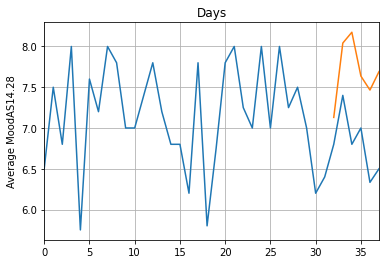

Training user AS14.16
epoch:   1 loss: 0.73329544
epoch:  26 loss: 0.00022294
epoch:  51 loss: 0.00347382
epoch:  75 loss: 0.0000110021


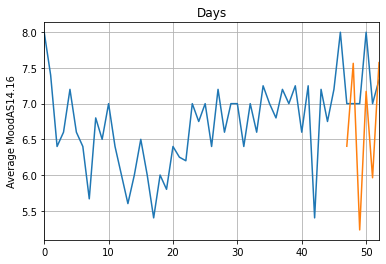

Training user AS14.13
epoch:   1 loss: 0.13076758
epoch:  26 loss: 0.08353370
epoch:  51 loss: 0.00220876
epoch:  75 loss: 0.0081626866


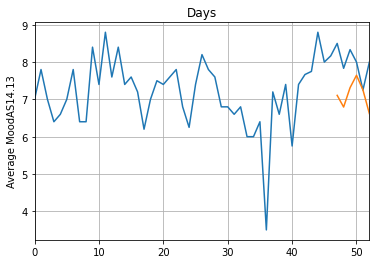

Training user AS14.03
epoch:   1 loss: 0.28274229
epoch:  26 loss: 0.02126510
epoch:  51 loss: 0.00039608
epoch:  75 loss: 0.0120068183


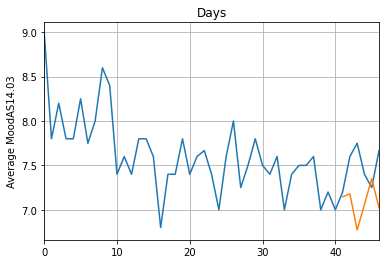

Training user AS14.29
epoch:   1 loss: 0.02574475
epoch:  26 loss: 0.00002727
epoch:  51 loss: 0.00012321
epoch:  75 loss: 0.0000151138


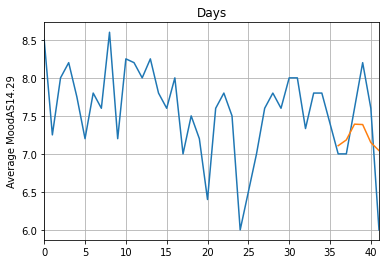

Training user AS14.15
epoch:   1 loss: 0.02369085
epoch:  26 loss: 0.02674836
epoch:  51 loss: 0.00015053
epoch:  75 loss: 0.0004086247


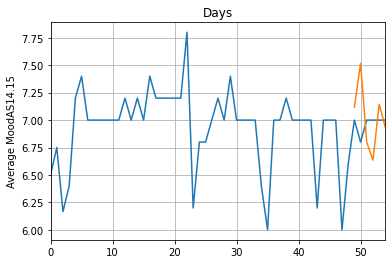

Training user AS14.08
epoch:   1 loss: 0.20162407
epoch:  26 loss: 0.00023909
epoch:  51 loss: 0.00000443
epoch:  75 loss: 0.0002879943


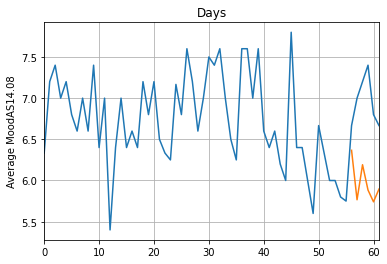

Training user AS14.02
epoch:   1 loss: 0.11040646
epoch:  26 loss: 0.00001127
epoch:  51 loss: 0.00001201
epoch:  75 loss: 0.0004696773


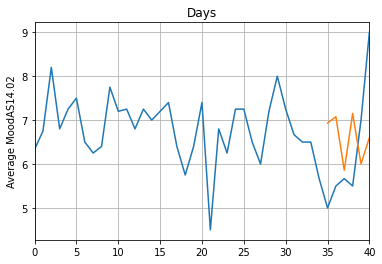

Training user AS14.01
epoch:   1 loss: 0.02055978
epoch:  26 loss: 0.00007324
epoch:  51 loss: 0.00002116
epoch:  75 loss: 0.0000784657


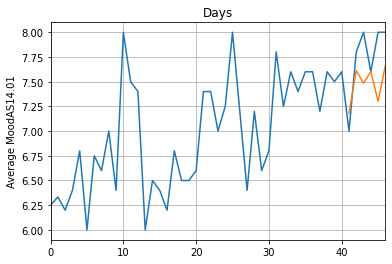

Training user AS14.09
epoch:   1 loss: 0.00533130
epoch:  26 loss: 0.00025082
epoch:  51 loss: 0.00078865
epoch:  75 loss: 0.0002580953


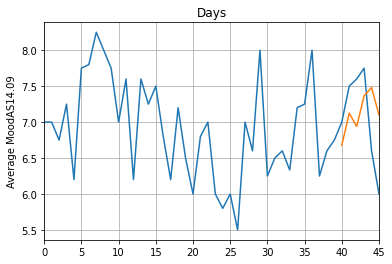

Training user AS14.14
epoch:   1 loss: 0.44306916
epoch:  26 loss: 0.00000061
epoch:  51 loss: 0.00016536
epoch:  75 loss: 0.0000165090


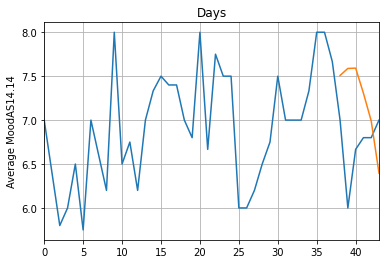

In [ ]:
df['av_mood'] = df2['mood']
df.dropna(subset=['mood'], inplace=True)
df.fillna(0, inplace=True)


window = 28
train_array = []


model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

test_pred = []
test_label = []

for user in set(df.index.get_level_values(0)):
  print('Training user ' + user)
  sinlge_user_test_df = df.loc[[user]]
  sinlge_user_test_df.reset_index(level='id', drop='False', inplace=True)
  bla = sinlge_user_test_df['av_mood']
  bla = bla.interpolate(limit=1)

  bla = sinlge_user_test_df['av_mood'].dropna()
  bla = np.array(bla)
  test_data_size = 6

  train_data = bla[:-test_data_size]
  test_data = bla[-test_data_size:]


  scaler = MinMaxScaler(feature_range=(-1, 1))
  train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))
  train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

  train_window = 21

  train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

  epochs = 76
  model.train()
  for i in range(epochs):
      
      for seq, labels in train_inout_seq:
          optimizer.zero_grad()
          model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                          torch.zeros(1, 1, model.hidden_layer_size))

          y_pred = model(seq)

          single_loss = loss_function(y_pred, labels)
          single_loss.backward()
          optimizer.step()

      if i%25 == 1:
          print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

  print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')
  fut_pred = 6

  test_inputs = train_data_normalized[-train_window:].tolist()
  # print(test_inputs)
  model.eval()

  for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

  actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
  test_pred.append(float(actual_predictions[0][0]))
  test_label.append(bla[len(bla)-len(actual_predictions)+1])

  x = np.arange(len(bla)-len(actual_predictions), len(bla), 1)
  plt.title('Days')
  plt.ylabel('Average Mood'+user)
  plt.grid(True)
  plt.autoscale(axis='x', tight=True)
  plt.plot(bla)
  plt.plot(x,actual_predictions)
  plt.show()

In [ ]:
test_pred = np.array(test_pred)
test_label = np.array(test_label)

u = ((test_label - test_pred) ** 2).sum()
v = ((test_label - test_label.mean()) ** 2).sum()

print('SKLEARN score = ', (1- (u/v)))

print(test_pred - test_label)
print('MSE Loss = ' , ((test_pred - test_label)**2).mean())

SKLEARN score =  0.10978460891588249
[ 0.81286645  0.44337673 -0.58766263  0.54698713  1.1552924  -0.95084726
  0.14358921 -0.17714108 -0.16278775 -0.17427073  0.89670626 -0.02972466
  0.34969835 -0.63999262  0.03822672 -0.21988058 -0.27006787 -0.59664536
 -0.72555279 -0.45388769  0.10771708  0.31706531 -0.63331565  1.43233009
 -0.61717388 -0.82145141  1.50840762]
MSE Loss =  0.4553090130513802


In [ ]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [ ]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)


[[6.00119968]
 [6.34284234]
 [6.31076949]
 [6.64312924]
 [6.36746221]
 [6.48663933]
 [5.84084309]
 [6.68344976]
 [5.89102623]
 [6.82167378]
 [5.81996037]
 [6.76465145]
 [5.56206989]
 [6.71943533]
 [6.09189002]
 [6.75159092]
 [6.23673063]
 [6.59698896]]


In [ ]:
x = np.arange(len(bla)-len(actual_predictions), len(bla), 1)


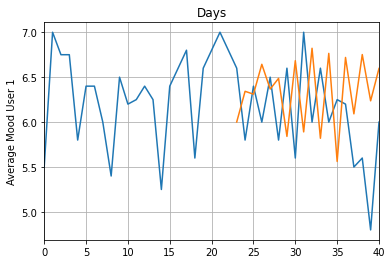

In [ ]:
plt.title('Days')
plt.ylabel('Average Mood User 1')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(bla)
plt.plot(x,actual_predictions)
plt.show()